<a href="https://colab.research.google.com/github/victorncg/aulas_palestras/blob/main/20220328_Fronteira_Eficiente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Demonstração da Fronteira Eficiente**

Fronteira Eficiente é um conceito apresentado por Harry Markowitz. Nele é apresentado que o risco de uma carteira não é dado simplesmente pela média dos ativos individuais, mas sim pela diversificação da carteira de investimento como um todo.




Mais:
https://www.suno.com.br/artigos/fronteira-eficiente/#:~:text=Fronteira%20Eficiente%20%C3%A9%20um%20conceito,de%20investimento%20como%20um%20todo.

# 1. Instalando e Importando bibliotecas

In [182]:
!pip install yfinance

In [183]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Selecionar ativos da carteira

In [188]:
ativos = ['ABEV3.SA', 'AAPL34.SA','EQTL3.SA', 'LREN3.SA', 
          'CIEL3.SA', 'RADL3.SA', 'RENT3.SA', 'MDIA3.SA', 
          'WEGE3.SA', 'EZTC3.SA', 'FLRY3.SA','BOVA11.SA', 'TSLA34.SA']

In [189]:
inicio = '2016-01-01'
fim = '2022-03-28'

In [186]:
yf.download('PRIO3.SA', start = inicio, end = fim).head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,0.235,0.239,0.226,0.230,0.230,378000
2016-01-05,0.250,0.250,0.224,0.224,0.224,414000
2016-01-06,0.220,0.224,0.216,0.223,0.223,419000
2016-01-07,0.216,0.225,0.213,0.225,0.225,657000
2016-01-08,0.229,0.229,0.215,0.215,0.215,180000


In [190]:
df = yf.download(ativos, start = inicio, end = fim)['Adj Close']

[*********************100%***********************]  13 of 13 completed


# 3. Visualizando os preços

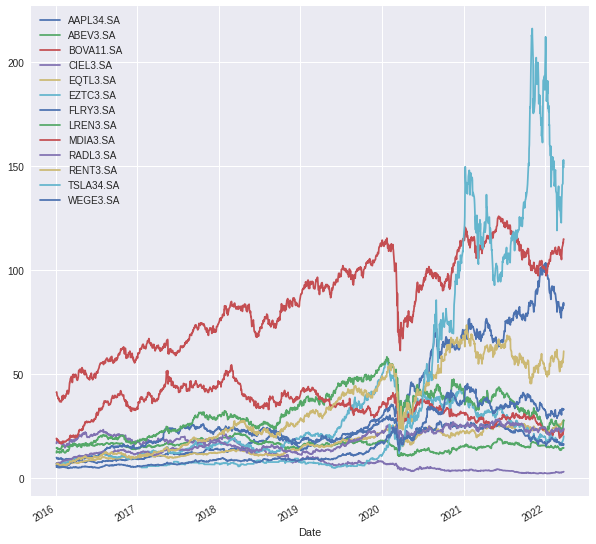

In [191]:
df.plot(figsize = (10,10))

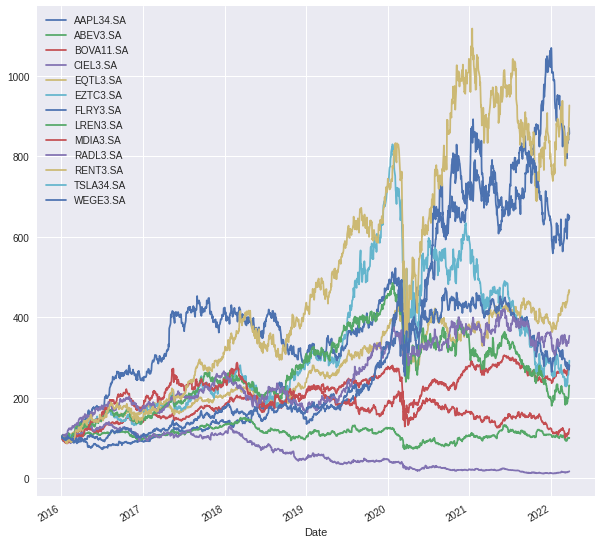

In [192]:
((df/df.iloc[0])*100).plot(figsize = (10,10))

In [194]:
df.tail()

,AAPL34.SA,ABEV3.SA,BOVA11.SA,CIEL3.SA,EQTL3.SA,EZTC3.SA,FLRY3.SA,LREN3.SA,MDIA3.SA,RADL3.SA,RENT3.SA,TSLA34.SA,WEGE3.SA
Date,,,,,,,,,,,,,
2022-03-21,81.199997,14.18,111.940002,2.70,26.820000,17.556421,15.702421,23.901062,20.670000,22.450001,55.250000,141.389999,32.513603
2022-03-22,83.099998,14.38,113.099998,2.69,27.240000,18.219664,16.210188,24.756090,21.400000,22.780001,57.389999,152.419998,32.963100
2022-03-23,82.809998,14.19,112.900002,2.71,27.100000,18.410000,15.530000,26.150000,21.990000,22.950001,57.520000,150.880005,32.713383
2022-03-24,84.139999,14.20,114.739998,2.83,27.500000,19.230000,15.730000,27.650000,22.830000,23.290001,59.160000,152.800003,33.092957
2022-03-25,82.760002,14.32,114.750000,2.89,27.299999,19.969999,16.180000,27.580000,23.139999,23.680000,60.830002,149.250000,32.843239


# 4. Calculando retornos diários e anuais dos papéis

In [195]:
retorno_diario = df.pct_change()

In [196]:
retorno_diario.head()

,AAPL34.SA,ABEV3.SA,BOVA11.SA,CIEL3.SA,EQTL3.SA,EZTC3.SA,FLRY3.SA,LREN3.SA,MDIA3.SA,RADL3.SA,RENT3.SA,TSLA34.SA,WEGE3.SA
Date,,,,,,,,,,,,,
2016-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,0.000000,0.015689,0.001947,0.047811,0.048485,0.017442,0.011803,0.071207,-0.025231,0.046644,0.024839,NaN,0.048497
2016-01-06,-0.022339,-0.009725,-0.016513,0.015408,0.005780,-0.016326,-0.005185,-0.005780,0.010101,0.009239,0.009194,NaN,-0.022802
2016-01-07,-0.045940,-0.026574,-0.025432,0.003793,-0.027586,-0.004150,0.001303,-0.016279,-0.029531,0.012924,-0.006211,NaN,-0.028666
2016-01-08,0.010955,0.013056,-0.003294,0.017442,0.013594,0.025000,0.003904,-0.002364,0.014330,-0.007975,0.000000,NaN,-0.004805


In [197]:
retorno_diario = retorno_diario.iloc[1:]

In [198]:
retorno_diario.head()

,AAPL34.SA,ABEV3.SA,BOVA11.SA,CIEL3.SA,EQTL3.SA,EZTC3.SA,FLRY3.SA,LREN3.SA,MDIA3.SA,RADL3.SA,RENT3.SA,TSLA34.SA,WEGE3.SA
Date,,,,,,,,,,,,,
2016-01-05,0.000000,0.015689,0.001947,0.047811,0.048485,0.017442,0.011803,0.071207,-0.025231,0.046644,0.024839,NaN,0.048497
2016-01-06,-0.022339,-0.009725,-0.016513,0.015408,0.005780,-0.016326,-0.005185,-0.005780,0.010101,0.009239,0.009194,NaN,-0.022802
2016-01-07,-0.045940,-0.026574,-0.025432,0.003793,-0.027586,-0.004150,0.001303,-0.016279,-0.029531,0.012924,-0.006211,NaN,-0.028666
2016-01-08,0.010955,0.013056,-0.003294,0.017442,0.013594,0.025000,0.003904,-0.002364,0.014330,-0.007975,0.000000,NaN,-0.004805
2016-01-11,0.002520,-0.015817,-0.015760,-0.047143,-0.001749,0.008130,-0.005833,-0.028436,-0.038095,-0.001340,0.001667,NaN,-0.022758


Anualizando os retornos

In [199]:
retorno_anual = retorno_diario.mean()*250

In [200]:
retorno_anual

AAPL34.SA    0.399450
ABEV3.SA     0.042157
BOVA11.SA    0.201549
CIEL3.SA    -0.166553
EQTL3.SA     0.286804
EZTC3.SA     0.282619
FLRY3.SA     0.223065
LREN3.SA     0.214956
MDIA3.SA     0.096568
RADL3.SA     0.252958
RENT3.SA     0.458730
TSLA34.SA    0.843015
WEGE3.SA     0.366861
dtype: float64

**Cálculo da covariância**

A covariância é uma medida estatística onde é possível comparar duas variáveis, permitindo entender como elas se relacionam entre si.

No mundo das finanças, essa medida pode ser usada para avaliar o comportamento do preço do ativo X quando o ativo Y aumenta ou diminui. A aplicação desse cálculo permite fazer uma gestão de risco da carteira de modo bem mais eficiente.

Fonte: https://www.suno.com.br/artigos/covariancia/

In [201]:
cov_diario = retorno_diario.cov()

In [202]:
cov_diario

,AAPL34.SA,ABEV3.SA,BOVA11.SA,CIEL3.SA,EQTL3.SA,EZTC3.SA,FLRY3.SA,LREN3.SA,MDIA3.SA,RADL3.SA,RENT3.SA,TSLA34.SA,WEGE3.SA
AAPL34.SA,0.000425,0.000034,0.000038,0.000049,0.000021,0.000026,0.000014,0.000021,0.000021,0.000012,0.000033,0.000244,0.000053
ABEV3.SA,0.000034,0.000327,0.000173,0.000199,0.000129,0.000213,0.000135,0.000208,0.000158,0.000129,0.000197,0.000056,0.000161
BOVA11.SA,0.000038,0.000173,0.000283,0.000248,0.000181,0.000323,0.000183,0.000285,0.000185,0.000146,0.000313,0.000102,0.000210
CIEL3.SA,0.000049,0.000199,0.000248,0.000924,0.000201,0.000340,0.000190,0.000297,0.000220,0.000167,0.000328,0.000074,0.000207
EQTL3.SA,0.000021,0.000129,0.000181,0.000201,0.000309,0.000267,0.000163,0.000222,0.000139,0.000117,0.000234,0.000064,0.000155
EZTC3.SA,0.000026,0.000213,0.000323,0.000340,0.000267,0.000877,0.000273,0.000458,0.000288,0.000210,0.000471,0.000113,0.000266
FLRY3.SA,0.000014,0.000135,0.000183,0.000190,0.000163,0.000273,0.000449,0.000252,0.000161,0.000145,0.000268,0.000101,0.000166
LREN3.SA,0.000021,0.000208,0.000285,0.000297,0.000222,0.000458,0.000252,0.000639,0.000216,0.000197,0.000436,0.000097,0.000234
MDIA3.SA,0.000021,0.000158,0.000185,0.000220,0.000139,0.000288,0.000161,0.000216,0.000508,0.000132,0.000243,0.000088,0.000185
RADL3.SA,0.000012,0.000129,0.000146,0.000167,0.000117,0.000210,0.000145,0.000197,0.000132,0.000389,0.000210,0.000044,0.000181


In [203]:
cov_anual = cov_diario*250

In [204]:
num_assets = len(ativos)

In [205]:
num_assets

13

In [206]:
peso = np.random.random(num_assets)

In [207]:
peso

array([0.45148578, 0.77047077, 0.84021837, 0.44703512, 0.58481606,
       0.64200429, 0.44383232, 0.20381522, 0.34251682, 0.50910755,
       0.09201844, 0.20713134, 0.96357321])

In [128]:
# Como calculamos os retornos segundo a MPT?
np.dot(peso, retorno_anual)

1.6329618541633266

In [129]:
# Como calculamos a volatilidade segundo a MPT?
np.sqrt(np.dot(peso.T, np.dot(cov_anual, peso)))

1.1082472474309506

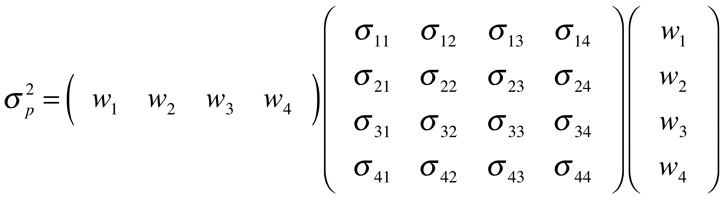

In [130]:
from IPython.display import Image
Image('https://i.stack.imgur.com/U4B9I.png')

# 5. Iniciando Simulação de Monte Carlo

Vamos utilizar uma simulação estocástica para criar 200 mil portfólio randomizados e dessa forma verificar a formação de uma fronteira eficiente

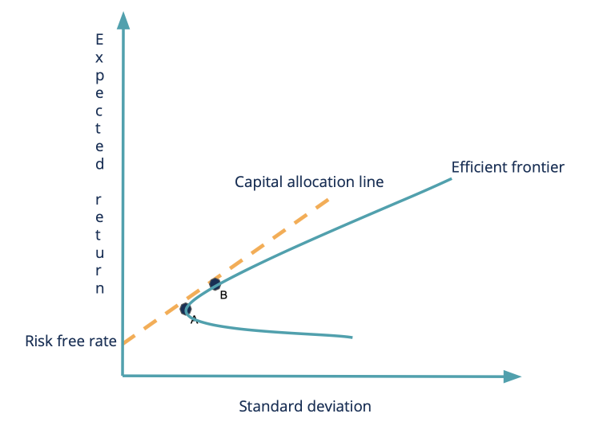

In [131]:
from IPython.display import Image
Image('https://cdn.corporatefinanceinstitute.com/assets/modern-portfolio-theory1.jpeg.png')

In [132]:
# Aqui vamos criar 200 mil portfólios fictícios com esses papéis

In [133]:
port_returns = []

port_volatility = []

stock_weights = []

In [134]:
# Vamos passar os parâmetros de simulação

In [135]:
num_assets = len(ativos)

num_portfolios = 200000

In [136]:
# Vamos usar a função random para criar 10 pesos aleatórios

In [137]:
peso = np.random.random(num_assets)

In [138]:
peso /= np.sum(peso)

In [139]:
peso

array([0.08874085, 0.01210411, 0.01589356, 0.1038201 , 0.1331987 ,
       0.10035837, 0.02323656, 0.03182777, 0.02714771, 0.12989991,
       0.10869368, 0.10183353, 0.12324517])

In [140]:
np.sum(peso)

1.0000000000000002

In [141]:
range(num_portfolios)

range(0, 200000)

In [142]:
for single_portfolio in range(num_portfolios):
  
  # Criando pesos aleatórios para os papéis - essa variável é completamente aleatória
  weights = np.random.random(num_assets)
  
  # Normalizando para que sejam 100%
  weights /= np.sum(weights)

  # Cálculo do retorno do portfólio
  returns = np.dot(weights, retorno_anual)

  # Cálculo da volatilidade para cada um dos portfólios
  volatility = np.sqrt(np.dot(weights.T, np.dot(cov_anual, weights)))

  port_returns.append(returns)
  port_volatility.append(volatility)
  stock_weights.append(weights)

In [144]:
#stock_weights

In [145]:
portfolio = {'Retornos': port_returns, 'Volatilidade': port_volatility}

Criando um dataframe que contém as características de cada portfólio, como o retorno, volatilidade e os pesos de cada ativo

In [146]:
for counter,symbol in enumerate(ativos):
  portfolio[symbol+' peso'] = [weight[counter] for weight in stock_weights]

df = pd.DataFrame(portfolio)

In [147]:
df.head()

,Retornos,Volatilidade,ABEV3.SA peso,AAPL34.SA peso,EQTL3.SA peso,LREN3.SA peso,CIEL3.SA peso,RADL3.SA peso,RENT3.SA peso,MDIA3.SA peso,WEGE3.SA peso,EZTC3.SA peso,FLRY3.SA peso,BOVA11.SA peso,TSLA34.SA peso
0,0.287285,0.247960,0.034171,0.134425,0.100064,0.083932,0.002466,0.023795,0.128513,0.035837,0.045165,0.013634,0.198915,0.096362,0.102721
1,0.216577,0.251578,0.019997,0.040833,0.048655,0.122666,0.136315,0.116229,0.055837,0.092352,0.109094,0.106640,0.088418,0.025353,0.037609
2,0.270185,0.210726,0.136662,0.139304,0.049531,0.023261,0.131790,0.056252,0.118542,0.005618,0.140709,0.012721,0.062860,0.066352,0.056398
3,0.275204,0.233627,0.027954,0.064193,0.031781,0.096943,0.057022,0.039106,0.104273,0.074998,0.118348,0.111902,0.066039,0.122132,0.085308
4,0.258422,0.245203,0.105567,0.009950,0.119308,0.038046,0.002822,0.111197,0.101311,0.158947,0.133186,0.069989,0.089176,0.032455,0.028046


In [148]:
retornos = df.sort_values(by = ['Retornos'], ascending = False)

In [149]:
retornos.head()

,Retornos,Volatilidade,ABEV3.SA peso,AAPL34.SA peso,EQTL3.SA peso,LREN3.SA peso,CIEL3.SA peso,RADL3.SA peso,RENT3.SA peso,MDIA3.SA peso,WEGE3.SA peso,EZTC3.SA peso,FLRY3.SA peso,BOVA11.SA peso,TSLA34.SA peso
131038,0.442097,0.253804,0.173461,0.003476,0.047578,0.024928,0.079836,0.007464,0.123118,0.031360,0.033768,0.016612,0.191264,0.241120,0.026014
145072,0.439053,0.246494,0.205729,0.032960,0.093777,0.020895,0.176591,0.004518,0.031034,0.041126,0.006210,0.013103,0.087412,0.258752,0.027894
192852,0.436960,0.266646,0.083661,0.002585,0.090922,0.013824,0.135229,0.052602,0.002430,0.084171,0.055131,0.002288,0.197517,0.243672,0.035968
23196,0.429129,0.250930,0.138395,0.021992,0.030019,0.001710,0.021209,0.067422,0.036729,0.085973,0.033943,0.091002,0.147146,0.215296,0.109164
810,0.427733,0.267116,0.062359,0.162820,0.021554,0.016009,0.019728,0.003526,0.051060,0.060102,0.000974,0.005244,0.212898,0.259288,0.124438


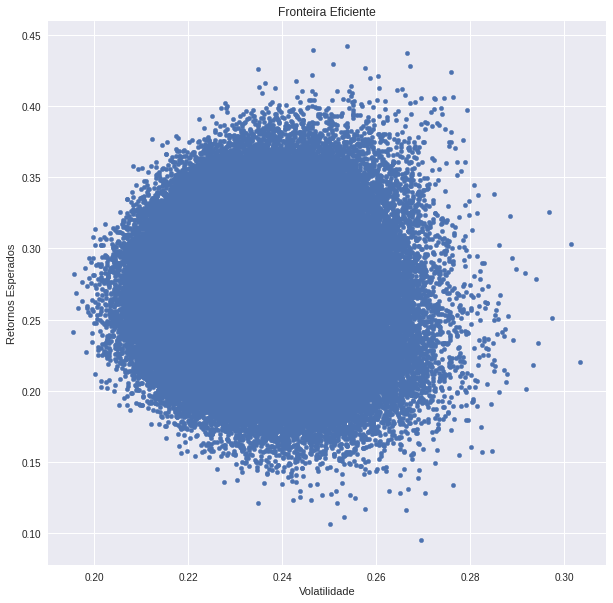

In [150]:
plt.style.use('seaborn')

df.plot.scatter(x = 'Volatilidade', y = 'Retornos', figsize = (10,10), grid = True)

plt.xlabel('Volatilidade')

plt.ylabel('Retornos Esperados')

plt.title('Fronteira Eficiente')

plt.show()

In [151]:
retorno_max = retornos.iloc[:1]

In [152]:
retorno_max = retorno_max.drop(['Retornos', 'Volatilidade'], axis = 1)

In [153]:
retorno_max

,ABEV3.SA peso,AAPL34.SA peso,EQTL3.SA peso,LREN3.SA peso,CIEL3.SA peso,RADL3.SA peso,RENT3.SA peso,MDIA3.SA peso,WEGE3.SA peso,EZTC3.SA peso,FLRY3.SA peso,BOVA11.SA peso,TSLA34.SA peso
131038,0.173461,0.003476,0.047578,0.024928,0.079836,0.007464,0.123118,0.03136,0.033768,0.016612,0.191264,0.24112,0.026014


In [154]:
ativos

['ABEV3.SA',
 'AAPL34.SA',
 'EQTL3.SA',
 'LREN3.SA',
 'CIEL3.SA',
 'RADL3.SA',
 'RENT3.SA',
 'MDIA3.SA',
 'WEGE3.SA',
 'EZTC3.SA',
 'FLRY3.SA',
 'BOVA11.SA',
 'TSLA34.SA']

In [155]:
pesos = np.array(retorno_max)

In [156]:
pesos

array([[0.17346136, 0.00347587, 0.04757845, 0.02492754, 0.07983622,
        0.00746373, 0.12311769, 0.03136012, 0.03376806, 0.01661244,
        0.19126382, 0.24112028, 0.02601441]])

In [157]:
retorno_carteira = retorno_diario*pesos

In [158]:
retorno_carteira.tail()

,AAPL34.SA,ABEV3.SA,BOVA11.SA,CIEL3.SA,EQTL3.SA,EZTC3.SA,FLRY3.SA,LREN3.SA,MDIA3.SA,RADL3.SA,RENT3.SA,TSLA34.SA,WEGE3.SA
Date,,,,,,,,,,,,,
2022-03-21,-0.001902,-0.000017,0.000520,0.000186,0.000239,0.000071,-0.000821,-0.000143,-0.000953,-0.000212,-0.003634,0.001096,-0.000578
2022-03-22,0.004059,0.000049,0.000493,-0.000092,0.001250,0.000282,0.003981,0.001122,0.001193,0.000244,0.007408,0.018810,0.000360
2022-03-23,-0.000605,-0.000046,-0.000084,0.000185,-0.000410,0.000078,-0.005166,0.001766,0.000931,0.000124,0.000433,-0.002436,-0.000197
2022-03-24,0.002786,0.000002,0.000775,0.001104,0.001178,0.000332,0.001586,0.001799,0.001290,0.000246,0.005453,0.003068,0.000302
2022-03-25,-0.002845,0.000029,0.000004,0.000529,-0.000581,0.000287,0.003522,-0.000079,0.000459,0.000278,0.005399,-0.005602,-0.000196


In [159]:
retorno_carteira = retorno_carteira.sum(axis = 1)

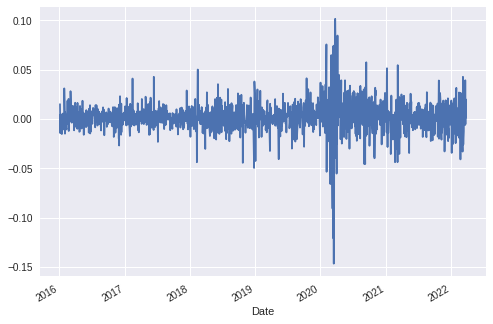

In [160]:
retorno_carteira.plot()

In [161]:
# Retorno acumulado

In [162]:
returns_acm = (1 + retorno_carteira).cumprod()

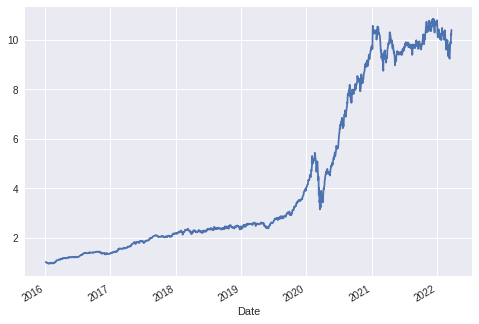

In [163]:
returns_acm.plot()

In [164]:
# Importando dados do IBOV para Benchmark

In [165]:
ibov = yf.download('^BVSP', start = inicio, end = fim)['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [166]:
type(ibov)

pandas.core.series.Series

In [167]:
ibov_retornos = ibov.pct_change()

In [168]:
ibov_retornos_acm = (1 + ibov_retornos).cumprod()

In [169]:
pd.DataFrame(ibov_retornos_acm)

,Adj Close
Date,
2016-01-04,NaN
2016-01-05,1.006597
2016-01-06,0.991267
2016-01-07,0.965687
2016-01-08,0.963717
...,...
2022-03-21,2.756342
2022-03-22,2.782848
2022-03-23,2.787238


In [170]:
novo_df = pd.merge(pd.DataFrame(ibov_retornos_acm), pd.DataFrame(returns_acm, columns = ['Minha Carteira']), how = 'inner', on = 'Date')

In [171]:
novo_df.rename(columns = {'Adj Close': 'IBOV'}, inplace = True)

In [172]:
novo_df.head()

,IBOV,Minha Carteira
Date,,
2016-01-05,1.006597,1.014962
2016-01-06,0.991267,1.011784
2016-01-07,0.965687,0.997137
2016-01-08,0.963717,1.001254
2016-01-11,0.948008,0.996434


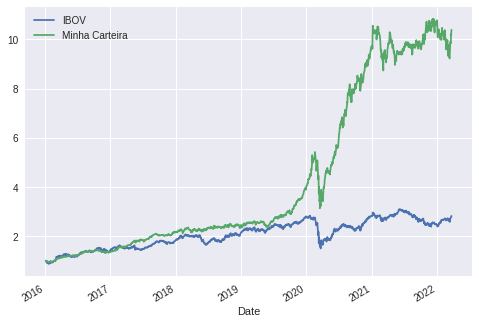

In [173]:
novo_df.plot()

[*********************100%***********************]  1 of 1 completed


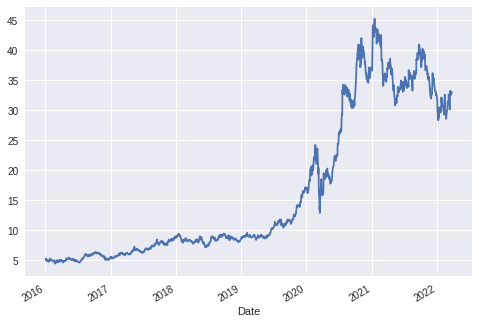

In [208]:
(yf.download('WEGE3.SA', start = inicio, end = fim)['Adj Close']).plot()